# Perkenalan

Nama : Hillidatul Ilmi

Batch : 12

# Dataset Description

- Pada graded challenge ini, data diakses menggunakan bigquery-public-data pada Google Cloud Big Query.
- Buka Google Cloud Platform, masuk ke BigQuery, lalu buka tab bigquery-public-data atau klik link berikut atau link berikut untuk langsung menuju ke dataset.

 Berikut adalah syntax yang saya gunakan dalam membuat query dari database :

In [ ]:
SELECT # memangil data dari database dengan memilih tabel serta kolom di dalam sel nya
trips.trip_id, trips.start_date, trips.start_station_name, 
trips.end_station_name, trips.start_station_latitude, trips.start_station_longitude, 
trips.end_station_latitude, trips.end_station_longitude, stations.region_id # Hanya memangil kolom dari tabel yang diperlukan saja

#Dileptop saya memangil databasenya hanya bisa dilakukan jika tidak memakai tanda '' atau mengcopy langsung dari detail lokasinya
#Menampikan select kolom dari tabel trips yang digabungkan tabel stations dengan metode pengabungan INNER JOIN
#Pengabungan INNER JOIN, dimana select tabel trips dan stations di ambil irisan yang sama
FROM bigquery-public-data.san_francisco_bikeshare.bikeshare_trips AS trips
JOIN bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info As stations
ON trips.start_station_id = stations.station_id #Setiap ada JOI pasti diiringi oleh ON

#Dimana di dalam dataset tabel trips dan stations untuk kolom yang diperlukan tidak mengandung missing value atau is not null
WHERE (trips.start_station_name != trips.end_station_name) AND
(trips.start_station_latitude IS NOT NULL) AND
(trips.start_station_longitude IS NOT NULL) AND
(trips.end_station_latitude IS NOT NULL) AND
(trips.end_station_longitude IS NOT NULL) AND
(trips.start_date >='2017-08-01' AND trips.start_date <= '2018-01-01'); #start_date dengan rentang tanggal lahir saya di tahun 2017 sampai 5 bulan berikutnya


Berdasarkan perintah query yang di jalankan, maka menghasilkan dataset query yang memiliki ukuran 427954 baris dengan 9 kolom, yang jika di save result google drive memakan memori 57,8 MB. Berdasarkan Data query ini akan di analisis untuk Problem 1 dan Problem 2.

# Problem 1

Problem 1 menganasis kasus tentang proyek sistem persepedaan di San Francisco
Smart City, dengan menghitung dan mengoptimasi sebagai sudut pandang Data Scinence. Tugas pertama yang dilakukan harus mencari stasiun awal mana yang paling favorit di antara stasiun-stasiun lainnya dengan menghitung PageRank menggunakan Eigendecomposition. Dalam mencapai proyek yang berhasil dilakukan langkah-langkah proses analisis sebagai berikut :



1. Buatlah dua variable baru yang bernama start_stations dan end_stations yang masing-masing berisikan list nama stasiun awal dan stasiun akhir. Pastikan tidak ada nama stasiun yang duplikat di masing-masing variable

In [ ]:
#Menggungakan library pandas, numpy dan scipy
import pandas as pd
import numpy as np
from scipy.integrate import trapz

#Load data yang sudah di Query pada tahap Dataset Description
D = pd.read_csv('/content/h8dsft_P0GC2_Set_1_HillidatulIlmi.csv')
D

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,2.565200e+19,2017-10-06 16:12:39 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
1,1.900200e+19,2017-10-12 16:01:32 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
2,1.692020e+18,2017-11-14 11:33:20 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
3,9.632020e+18,2017-10-24 16:21:43 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
4,1.728200e+19,2017-12-07 18:07:25 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
...,...,...,...,...,...,...,...,...,...
427949,3.109200e+19,2017-12-18 17:26:41 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
427950,3.101200e+19,2017-11-25 10:28:57 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
427951,1.605200e+19,2017-09-27 17:36:09 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
427952,2.884200e+19,2017-09-11 17:01:39 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3


In [ ]:
#Memastikan tidak ada nama stasiun awal yang duplikat pada variable start_stations menggunakan perintah drop_duplicates
start_stations = D.drop_duplicates(subset=['start_station_name'])['start_station_name']
start_stations

0                                                 Snow Park
530                                              SAP Center
632                                             Cahill Park
827                                             Duboce Park
1861                                            Esprit Park
                                ...                        
203029    San Francisco Ferry Building (Harry Bridges Pl...
209070    San Francisco Public Library (Grove St at Hyde...
210518    Yerba Buena Center for the Arts (Howard St at ...
211642    Civic Center/UN Plaza BART Station (Market St ...
255857                                Jackson St at 11th St
Name: start_station_name, Length: 260, dtype: object

In [ ]:
#Memastikan tidak ada nama stasiun akhir yang duplikat pada variable end_station menggunakan perintah drop_duplicates
end_station = D.drop_duplicates(subset=['end_station_name'])['end_station_name']
end_station 

0                          Mosswood Park
9                         DeFremery Park
11                      San Antonio Park
16                     45th St at Manila
17                    12th St at 4th Ave
                       ...              
123745    Delmas Ave and San Fernando St
125735             Jackson St at 11th St
127801            Fruitvale BART Station
241502               Empire St at 1st St
344536        Ellsworth St at Russell St
Name: end_station_name, Length: 272, dtype: object

Berdasarkan perintah yang sudah di lakukan pada langkah 1, variabel baru start_stations dan end_stations sudah berisikan yang list nama stasiun awal dan stasiun akhir yang tidak duplikat.

2. Deteksi stasiun-stasiun yang hanya terdapat di salah satu variable dan tidak di keduanya (exclusive-or/xor) menggunakan np.setxor1d(array1,array2). Outputnya akan berupa numpy array dan masukkan output tersebut ke dalam variable bernama exclusive_stations

In [ ]:
# Numpy array membuat variabel start_station dan end_station bisa diterapkan pada vektor atau matriks
array1 = np.array(start_stations)
array2 = np.array(end_station)

In [ ]:
#Variabel array1 dan array 2 dibuat setxor1d agar keduanya menjadi satu bagian 
exclusive_stations = np.setxor1d(array1,array2)
exclusive_stations

array(['2nd St at S Park St', '5th St at Brannan St',
       '5th St at Howard St', '7th St at Brannan St',
       'Franklin St at 14th St', 'Golden Gate Ave at Hyde St',
       'Irwin St at 8th St', 'Jackson St at 14th St',
       'Laguna St at McAllister St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'W St John St at Guadalupe River Trail', 'Webster St at 17th St'],
      dtype=object)

In [ ]:
exclusive_stations.size

12

Berdasarkan perintah yang sudah di lakukan pada langkah 2, variabel baru exclusive_stations menghasilkan numpy array dengan size ukuran nya berisi 12 nama stations rute pesepedaan.

3. Buat dataframe yang berisikan cross-tabulation antara start_stations dan end_stations menggunakan pd.crosstab(pd.Series1,pd.Series2). Hasil dari langkah ini akan menghasilkan dataframe yang menginfokan berapa jumlah/frekuensi perjalanan dari start station tertentu ke end station tertentu. Hasil dari langkah ini dimasukkan ke dalam variable bernama df_matrix.

In [ ]:
#Cara 1 menggunakan variabel duplikat
#Akan menghasilkan Eigen decomposition yang frekunsi nya hanya bernilai 0 dan 1, sehingga tidak efektif memakai variabel yang sudah di duplikat

#start_station2 = pd.Series(array1)
#end_station2 = pd.Series(array2)
#print(len(start_station2))
#print(len(end_station2))
#df_matrix = pd.crosstab(start_station2,end_station2)

In [ ]:
#Cara 2 menggunakan Variabel apa adanya tanpa di duplikat
#dengan langsung crosstab pada kolom start_station_name dan end_station_name lebih diajurkan agar jumlah frekuensinya lebih terlihat

df_matrix = pd.crosstab(D.start_station_name,D.end_station_name)
df_matrix

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,12th St at 4th Ave,12th St at 6th Ave,13th St at Franklin St,14th St at Filbert St,14th St at Mandela Pkwy,14th St at Mission St,...,Washington St at Kearny St,Webster St at 17th St,Webster St at 19th St,Webster St at Grove St,Webster St at O'Farrell St,West Oakland BART Station,West St at 40th St,William St at 10th St,Willow St at Vine St,Yerba Buena Center for the Arts (Howard St at 3rd St)
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0,16,0,0,3,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10th St at Fallon St,25,0,0,0,174,36,0,0,2,0,...,0,9,0,0,0,1,0,0,0,0
11th St at Bryant St,0,0,0,27,0,0,0,0,0,18,...,0,0,0,1,8,0,0,0,0,11
11th St at Natoma St,0,0,33,0,0,0,0,0,0,14,...,1,0,0,6,17,0,0,0,0,7
12th St at 4th Ave,3,264,0,0,0,5,0,0,1,0,...,0,3,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Oakland BART Station,0,0,0,0,0,0,0,33,240,0,...,0,1,0,0,0,0,5,0,0,0
West St at 40th St,0,1,0,0,2,0,0,0,1,0,...,0,2,0,0,0,4,0,0,0,0
William St at 10th St,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_matrix.shape

(260, 272)

Berdasarkan perintah yang sudah di lakukan pada langkah 3, di hasilkan frekuensi perjalanan dari station awal menuju station akhir beragam jumlah nya pada masing-masing rute perjalanan. 

Misalkan interpretasi dari rute perjalanan sepeda 'station awal West Oakland BART Station' menuju ke 'station akhir 14th St at Filbert St' dengan rentang waktu 2017-08-10 s/d 2018-01-01, ditemukan sebanyak 33 rute perjalanan yang dilalui persepeda pada kota San Francisco Smart City.

4. Buatlah salinan dari data yang di-load ke dalam variable bernama df_copy.

In [ ]:
# mencopy data D, agar data asli masih tersedia
df_copy = D.copy()
df_copy

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,2.565200e+19,2017-10-06 16:12:39 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
1,1.900200e+19,2017-10-12 16:01:32 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
2,1.692020e+18,2017-11-14 11:33:20 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
3,9.632020e+18,2017-10-24 16:21:43 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
4,1.728200e+19,2017-12-07 18:07:25 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
...,...,...,...,...,...,...,...,...,...
427949,3.109200e+19,2017-12-18 17:26:41 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
427950,3.101200e+19,2017-11-25 10:28:57 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
427951,1.605200e+19,2017-09-27 17:36:09 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
427952,2.884200e+19,2017-09-11 17:01:39 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3


Berdasarkan perintah yang sudah di lakukan pada langkah 4, di hasilkan database baru bernama df_copy akan digunakan analisis tahap selanjutnya tanpa mengubah atau menganggu data asli D nya.

5. Filter df_copy dimana tidak ada start_station_name dan end_station_name yang termasuk dalam list exclusive_stations

In [ ]:
#Digunakan untuk mengecek elemen start_station_name dan end_station_name tidak di dalam dataframe exclusive_stations di langkah 2 sebelumnya
#dengan menggunakan dataset df_copy dilangkah 4 sebelumnya
df_copy = df_copy[
        (~df_copy['start_station_name'].isin(exclusive_stations)) &
        (~df_copy['end_station_name'].isin(exclusive_stations))
]
df_copy


,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,2.565200e+19,2017-10-06 16:12:39 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
1,1.900200e+19,2017-10-12 16:01:32 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
2,1.692020e+18,2017-11-14 11:33:20 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
3,9.632020e+18,2017-10-24 16:21:43 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
4,1.728200e+19,2017-12-07 18:07:25 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
...,...,...,...,...,...,...,...,...,...
427949,3.109200e+19,2017-12-18 17:26:41 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
427950,3.101200e+19,2017-11-25 10:28:57 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
427951,1.605200e+19,2017-09-27 17:36:09 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
427952,2.884200e+19,2017-09-11 17:01:39 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3


In [ ]:
df_copy.shape

(401024, 9)

Berdasarkan perintah yang sudah di lakukan pada langkah 5, di hasilkan start_station_name dan end_station_name yang isi listnya tidak sama dengan exclusive_stations dengan perintah .isin(), dimana yang jumlah awal 427954 baris × 9 kolom menjadi 401024 baris x 9 kolom.

6. Lakukan langkah 3 untuk variable df dan simpan ke dalam variable bernama df_matrix_square. Pastikan jumlah rows dan columns sama, kalau tidak ulangi dari langkah 4.

In [ ]:
#Menampilkan jumlah/frekuensi station awal dan station akhir menggunakan database df_copy yang sebelumnya sudah di filter .isin()
df_matrix_square = pd.crosstab(df_copy.start_station_name,df_copy.end_station_name)
df_matrix_square

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,12th St at 4th Ave,12th St at 6th Ave,13th St at Franklin St,14th St at Filbert St,14th St at Mandela Pkwy,14th St at Mission St,...,Washington St at 8th St,Washington St at Kearny St,Webster St at 19th St,Webster St at Grove St,Webster St at O'Farrell St,West Oakland BART Station,West St at 40th St,William St at 10th St,Willow St at Vine St,Yerba Buena Center for the Arts (Howard St at 3rd St)
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0,16,0,0,3,3,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
10th St at Fallon St,25,0,0,0,174,36,0,0,2,0,...,40,0,0,0,0,1,0,0,0,0
11th St at Bryant St,0,0,0,27,0,0,0,0,0,18,...,0,0,0,1,8,0,0,0,0,11
11th St at Natoma St,0,0,33,0,0,0,0,0,0,14,...,0,1,0,6,17,0,0,0,0,7
12th St at 4th Ave,3,264,0,0,0,5,0,0,1,0,...,7,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Oakland BART Station,0,0,0,0,0,0,0,33,240,0,...,20,0,0,0,0,0,5,0,0,0
West St at 40th St,0,1,0,0,2,0,0,0,1,0,...,3,0,0,0,0,4,0,0,0,0
William St at 10th St,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Berdasarkan perintah yang sudah di lakukan pada langkah 6, dihasilkan variabel df_matrix_square memiiki jumlah baris dan kolom sama yaitu 260 x 260.

7. Jumlahkan nilai kolom masing-masing rows pada df_matrix_square menggunakan method sum(axis=1) dan simpan ke dalam variable bernama total_trips.

In [ ]:
# Menampilkan perjumlahan axis 1 untuk baris nama station
total_trips = df_matrix_square.sum(axis=1)
total_trips

start_station_name
10th Ave at E 15th St                                     158
10th St at Fallon St                                     1230
11th St at Bryant St                                     1436
11th St at Natoma St                                     1564
12th St at 4th Ave                                        804
                                                         ... 
West Oakland BART Station                                1070
West St at 40th St                                        377
William St at 10th St                                     134
Willow St at Vine St                                       29
Yerba Buena Center for the Arts (Howard St at 3rd St)    1935
Length: 260, dtype: int64

Berdasarkan perintah yang sudah di lakukan pada langkah 7, dihasilkan variabel total_trips dalam satu baris kumpulan nama station nya dengan panjang 260.

8. Bagi setiap kolom df_matrix_square dengan menggunakan method .div(), dengan inputan parameter total_trips dan axis='rows'. Masukkan hasilnya ke variable weighted_matrix_df.



In [ ]:
#Membuat matrix di dalam variabel df_matrix_square menjadi float dengan menggunakan .div()
weighted_matrix_df = df_matrix_square.div(total_trips,axis='rows')
weighted_matrix_df

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,12th St at 4th Ave,12th St at 6th Ave,13th St at Franklin St,14th St at Filbert St,14th St at Mandela Pkwy,14th St at Mission St,...,Washington St at 8th St,Washington St at Kearny St,Webster St at 19th St,Webster St at Grove St,Webster St at O'Farrell St,West Oakland BART Station,West St at 40th St,William St at 10th St,Willow St at Vine St,Yerba Buena Center for the Arts (Howard St at 3rd St)
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0.000000,0.101266,0.000000,0.000000,0.018987,0.018987,0.0,0.000000,0.000000,0.000000,...,0.018987,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
10th St at Fallon St,0.020325,0.000000,0.000000,0.000000,0.141463,0.029268,0.0,0.000000,0.001626,0.000000,...,0.032520,0.000000,0.0,0.000000,0.000000,0.000813,0.000000,0.0,0.0,0.000000
11th St at Bryant St,0.000000,0.000000,0.000000,0.018802,0.000000,0.000000,0.0,0.000000,0.000000,0.012535,...,0.000000,0.000000,0.0,0.000696,0.005571,0.000000,0.000000,0.0,0.0,0.007660
11th St at Natoma St,0.000000,0.000000,0.021100,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.008951,...,0.000000,0.000639,0.0,0.003836,0.010870,0.000000,0.000000,0.0,0.0,0.004476
12th St at 4th Ave,0.003731,0.328358,0.000000,0.000000,0.000000,0.006219,0.0,0.000000,0.001244,0.000000,...,0.008706,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Oakland BART Station,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.030841,0.224299,0.000000,...,0.018692,0.000000,0.0,0.000000,0.000000,0.000000,0.004673,0.0,0.0,0.000000
West St at 40th St,0.000000,0.002653,0.000000,0.000000,0.005305,0.000000,0.0,0.000000,0.002653,0.000000,...,0.007958,0.000000,0.0,0.000000,0.000000,0.010610,0.000000,0.0,0.0,0.000000
William St at 10th St,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


Berdasarkan perintah yang sudah di lakukan pada langkah 8, dihasilkan variabel weighted_matrix_df bertipe float dengan panjang baris dan kolomnya tetap sama yaitu 260 x 260.

9. Konversikan weighted_matrix_df ke numpy array

In [ ]:
#Mengubah weighted_matrix_df menjadi numpy array berupa vektor atau matriks
weighted_matrix_df = np.array(weighted_matrix_df)
weighted_matrix_df

array([[0.        , 0.10126582, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0203252 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00766017],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00930233, ..., 0.        , 0.        ,
        0.        ]])

Berdasarkan perintah yang sudah di lakukan pada langkah 9, dihasilkan variabel weighted_matrix_df menjadi bentuk matriks.

10. Hitung eigen value dan eigen vector menggunakan library numpy

In [ ]:
#Melihat atau menhitung nilai eigen value dan eigen vektor
eig_val, eig_vec = np.linalg.eig(weighted_matrix_df)

In [ ]:
#Nilai eigen value
eig_val

array([ 9.99490054e-01+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
        9.99927574e-01+0.00000000e+00j,  8.20945917e-01+0.00000000e+00j,
        6.39577253e-01+0.00000000e+00j,  5.88841013e-01+0.00000000e+00j,
        5.68357007e-01+0.00000000e+00j,  5.48613045e-01+0.00000000e+00j,
       -5.25210324e-01+0.00000000e+00j,  4.65876198e-01+0.00000000e+00j,
       -5.00136736e-01+0.00000000e+00j, -4.69374009e-01+0.00000000e+00j,
        4.22119355e-01+0.00000000e+00j, -4.32425711e-01+0.00000000e+00j,
       -3.92188764e-01+0.00000000e+00j, -4.11088938e-01+0.00000000e+00j,
       -4.00165978e-01+0.00000000e+00j, -3.65557699e-01+0.00000000e+00j,
       -3.43268005e-01+1.20182337e-02j, -3.43268005e-01-1.20182337e-02j,
        3.49296537e-01+0.00000000e+00j,  3.33086517e-01+0.00000000e+00j,
        3.25249324e-01+0.00000000e+00j,  3.27551882e-01+0.00000000e+00j,
       -3.05827411e-01+0.00000000e+00j,  2.82807060e-01+0.00000000e+00j,
        2.54641153e-01+0.00000000e+00j,  2.49870183

In [ ]:
#Nilai eigen vektor
eig_vec

array([[ 9.65438354e-02+0.00000000e+00j, -6.20173673e-02+0.00000000e+00j,
        -3.29847336e-03+0.00000000e+00j, ...,
        -1.01772168e-03+0.00000000e+00j, -3.06118419e-06+1.03667814e-05j,
        -3.06118419e-06-1.03667814e-05j],
       [ 9.65694964e-02+0.00000000e+00j, -6.20173673e-02+0.00000000e+00j,
        -3.30251253e-03+0.00000000e+00j, ...,
         3.02084633e-04+0.00000000e+00j,  9.26447190e-07+2.19726087e-06j,
         9.26447190e-07-2.19726087e-06j],
       [-1.04800236e-02+0.00000000e+00j, -6.20173673e-02+0.00000000e+00j,
         7.35541665e-03+0.00000000e+00j, ...,
        -2.46765676e-02+0.00000000e+00j,  6.86803447e-07-6.55722306e-07j,
         6.86803447e-07+6.55722306e-07j],
       ...,
       [ 1.64667525e-03+0.00000000e+00j, -6.20173673e-02+0.00000000e+00j,
        -1.57551251e-01+0.00000000e+00j, ...,
        -6.90299050e-04+0.00000000e+00j,  1.24316005e-01-6.45409761e-02j,
         1.24316005e-01+6.45409761e-02j],
       [ 1.64706324e-03+0.00000000e+00j, -6.

Berdasarkan perintah yang sudah di lakukan pada langkah 10, dihasilkan matrix eigen value dan matrix eigen vector.

11. Score PageRank terdapat pada eigen vector yang eigen valuenya paling tinggi. Simpan eigen vector tersebut ke dalam variable bernama PR_Scores.

In [ ]:
#Menampilakan seluruh nilai eigen value. Jika .abs menampilan nilai positifya saja tetapi .real menampilakan selurh nilai aslinya
for i,val in enumerate(eig_val):
    print('Nilai_eigen_value ke ', i, ': ', np.abs(eig_val[i]))

print('Posisi Eigen Value Terbesar Yaitu: ', np.argmax(eig_val))

Nilai_eigen_value ke  0 :  0.9994900536998187
Nilai_eigen_value ke  1 :  1.0000000000000018
Nilai_eigen_value ke  2 :  0.999927573840418
Nilai_eigen_value ke  3 :  0.8209459166415429
Nilai_eigen_value ke  4 :  0.6395772531386186
Nilai_eigen_value ke  5 :  0.5888410131004177
Nilai_eigen_value ke  6 :  0.5683570069455469
Nilai_eigen_value ke  7 :  0.5486130451416029
Nilai_eigen_value ke  8 :  0.5252103236987412
Nilai_eigen_value ke  9 :  0.46587619803105146
Nilai_eigen_value ke  10 :  0.5001367360545588
Nilai_eigen_value ke  11 :  0.4693740085671456
Nilai_eigen_value ke  12 :  0.42211935455533506
Nilai_eigen_value ke  13 :  0.4324257110915506
Nilai_eigen_value ke  14 :  0.3921887638164419
Nilai_eigen_value ke  15 :  0.411088938012285
Nilai_eigen_value ke  16 :  0.4001659778134686
Nilai_eigen_value ke  17 :  0.3655576985493153
Nilai_eigen_value ke  18 :  0.3434783266718565
Nilai_eigen_value ke  19 :  0.3434783266718565
Nilai_eigen_value ke  20 :  0.34929653678909356
Nilai_eigen_value ke  

Berdasarkan tampilan kemunculan nilai dengan perintah np.argmax diperoleh nilai eigen value terbesar ada di posisi ke index 1. Kemudian masukkan posisi eigen value yang sudah di dapat, kembali pada posisi i menjadi bernilai 1, agar bisa tau posisi real keberadaan eigen value nya.

In [ ]:
#np.argmax itu mencari nilai terbesar dari value
for i, eigvec_val in enumerate(eig_vec[1,:]):
    print('Eigen_Vector ', i ,' : ', eigvec_val.real)

print('\nPosisi Eigen Vector Terbesar Yaitu: ', np.argmax(eig_vec[1,:]))


Eigen_Vector  0  :  0.09656949635199212
Eigen_Vector  1  :  -0.062017367294618604
Eigen_Vector  2  :  -0.003302512529146718
Eigen_Vector  3  :  0.06148470678874259
Eigen_Vector  4  :  0.058709192183435434
Eigen_Vector  5  :  7.631940510208309e-05
Eigen_Vector  6  :  -0.0007998260706011519
Eigen_Vector  7  :  0.00014809467349560516
Eigen_Vector  8  :  -0.032652318195010174
Eigen_Vector  9  :  -0.1556365226381011
Eigen_Vector  10  :  0.046995677373713844
Eigen_Vector  11  :  -0.23967409697095213
Eigen_Vector  12  :  0.013538901491972528
Eigen_Vector  13  :  -0.31211564878125253
Eigen_Vector  14  :  0.004086647106247264
Eigen_Vector  15  :  0.0011058874595883711
Eigen_Vector  16  :  -0.0005316815653837085
Eigen_Vector  17  :  -0.001212330595890483
Eigen_Vector  18  :  -0.0014529737227678388
Eigen_Vector  19  :  -0.0014529737227678388
Eigen_Vector  20  :  -2.5659033432965095e-05
Eigen_Vector  21  :  -0.006055064961872598
Eigen_Vector  22  :  -3.298359063178243e-05
Eigen_Vector  23  :  -2.3

In [ ]:
#Menampilkan PR_Scores indeks 1 yang mengasilkan posisi eigen vector terbesar di posisi nol 
PR_Scores = eig_vec[0]
PR_Scores

array([ 9.65438354e-02+0.00000000e+00j, -6.20173673e-02+0.00000000e+00j,
       -3.29847336e-03+0.00000000e+00j,  5.89603570e-02+0.00000000e+00j,
        5.61886785e-02+0.00000000e+00j, -2.75899571e-04+0.00000000e+00j,
       -1.50984185e-02+0.00000000e+00j, -2.93928130e-02+0.00000000e+00j,
        8.41874763e-03+0.00000000e+00j, -9.44649691e-02+0.00000000e+00j,
        3.15811913e-03+0.00000000e+00j,  1.00260828e-01+0.00000000e+00j,
        9.44560228e-03+0.00000000e+00j,  1.14756384e-01+0.00000000e+00j,
        1.44494942e-02+0.00000000e+00j, -4.12760207e-04+0.00000000e+00j,
        2.16386194e-04+0.00000000e+00j,  1.21173335e-03+0.00000000e+00j,
        1.23295287e-03+3.35956943e-04j,  1.23295287e-03-3.35956943e-04j,
       -1.27883396e-05+0.00000000e+00j, -4.67797528e-03+0.00000000e+00j,
        1.72672886e-04+0.00000000e+00j, -1.24950409e-05+0.00000000e+00j,
       -3.47353392e-03+0.00000000e+00j, -6.92839278e-03+0.00000000e+00j,
        3.55823888e-05+0.00000000e+00j,  7.26702584

Berdasarkan perintah yang sudah di lakukan pada langkah 11, dihasilkan variabel PR_Scores dengan kumpulan eigen vektor paling terbesar di indeks ke satu.

12. Buat dataframe baru bernama PageRank_df dengan kolom 'start_station' yang berisikan value variable start_stations dan kolom score yang berisikan value variable PR_Scores.

In [ ]:
#Membuat data frame baru yang berisikan nilai urutan dari PR_score nya
PageRank_df = pd.DataFrame({'start_station' : start_stations})
PageRank_df['score']=PR_Scores

13. Tampilkan head dari dataframe PageRank_df!

In [ ]:
#Mengurutkan Nilai score dari start_station dari yang terkecil hingga terbesar
PageRank_df.sort_values(by = 'score')


,start_station,score
5613,Koshland Park,-0.094465+0.000000j
123007,San Jose Diridon Station,-0.080965-0.021941j
122879,San Carlos St at 11th St,-0.080965+0.021941j
74481,Ninth St at Heinz Ave,-0.076202-0.080705j
74526,Ninth St at Parker St,-0.076202+0.080705j
...,...,...
64777,Adeline St at 40th St,0.083477+0.022027j
74192,Locust St at Grant St,0.093064+0.000000j
0,Snow Park,0.096544+0.000000j
6869,DeFremery Park,0.100261+0.000000j


Berdasarkan perintah yang sudah di lakukan pada langkah 12 membuat variabel yang berisikan nilai PageRank_df, kemudian di langkah 13 menampilkan nilai score di masing-masing start_station. Dimana padah langkah 13, score tertinggi ada di start_station Franklin Square dan terendah ada di start_station Koshland Park.

**Kesimpulan Problem 1**

Proyek sistem rute pesepedaan di San Francisco Smart City, ditemukan ada beberapa nama station yang skore nya positif/tertinggi ada juga yang skore nya negatif/terendah.
Contoh Intepretasi :

Misalkan rute pesepada di start_station Franklin Square memiliki nilai eigendekomposisi yang positif/tertinggi sebesar 0.114756 sedangkan rute pesepeda di start_station Koshland Park memiliki niai eigendekmposisi yang negatif/terkecil sebesar -0.094465. Ulusan rute perjalanan pesepeda start_station Franklin Square lebih tinggi atau lebih baik dibandigkan start_station Koshland Park, sehingga sistem persepedaan di station Koshland Park harus di perbaiki lagi agar bisa nyaman atau lancar bagi para persepeda.

**Pertanyaan**

a. Mengapa dalam kasus ini kita menerapkan konsep Eigendecomposition?

Jawab : Dalam kasus persebedaan, kita ingin melihat score rute perjalanan dari statiun awal menuju statiun akhir, dalam membandingkan kedua station tersebut dibutuhkan metode eigen dekomposisi. Dimana eigen dekomposisi itu akan memfaktorkan sebuah matriks menjadi lebih dari satu matriks atau mematrikskan statiun awal dan station akhir untuk bisa di lihat jumlah frekuensinya. Sehingga kita bisa melihat salah satu karakteristik matriks tersebut atau station tersebut dalam ulasan rute perjalanan sepeda. 

b. Dari pengamatanmu, mengapa pada akhirnya kita menggunakan dataframe df_matrix_square dibandingkan df_matrix untuk dilakukan proses Eigendecomposition? Berikan alasan yang logis sesuai dengan konsep Eigendecomposition.

Jawab : Pada variabel df_matrix belum di drop dupliket atau pada proses crasstab menggunakan data asli apa adanya, sehingga ketika di proses akan menghasilkan ukuran matriks tidak persegi dimana jumlah baris dan kolom tidak sama atau pada kasus saya menghasilkan 260 baris x 272 kolom.  Prinsip dari metode eigendekomposisi harus membentuk matriks persegi atau kotak baru bisa dilakukan perhitungan eigen value/eigen vektor. Sedangkan variabel df_matrix_square sudah dilakukan crosstab dengan data yang sudah di drop duplikat atau df_copy.isin(), sehingga akan menghasilkan jumlah baris dan kolom sama, sehingga sesuai dengan prinsip eigen dekomposisi 260 baris x 260 kolom atau matriks berbentu persegi.

c. Jika dilihat dari PageRanknya, dimana nilai PageRank paling besar merupakan stasiun yang paling favorit. Apa insight yang akan kamu berikan?

Jawab : Berdasarkan proses yang dilakukan pada langkah ke 13 dengan mengurutkan nilai score dari PageRank di peroleh start_station Franklin Square memiliki score tertinggi sebesar 0.114756. Sehingga diharapkan start_station Franklin Square tetap konsisten mempertahankan ulasan positifnya terhadap rute perjalanan bagi para persepeda, sedangkan untuk start_station lain yang meiliki nilai rendah untuk selalu berusaha meningkatkan pelayanan bagi para persepeda atau memperbaiki segala sistem start_station tersebut. 

# Problem 2

Problem 2 menganalisis kasus tentang luas area lingkup statiun awal para persepeda di kota San Francisco Smart City dengan menggunakan metode integral.  Dalam mencapai proyek yang berhasil dilakukan langkah-langkah proses analisis sebagai berikut :

1.Buat variable baru bernama df_coor_stations yang berisikan data yang sudah di-load dimana kolom region_id = 3. Pastikan tidak ada data yang duplikat dan hanya menyertakan kolom start_station_name,start_station_latitude, dan start_station_longitude. Urutkan pula dataframe tersebut berdasarkan start_station_longitude dari nilai terkecil hingga terbesar.

In [ ]:
# Mengeload dataset
df_coor_stations = pd.read_csv('/content/h8dsft_P0GC2_Set_1_HillidatulIlmi.csv')

#Memfilter kolom yang ingin ditampilkan atau syarat kategori kolom yang ingin di tampilkan 
#Memfilter kolom region yang bernilai 3 dan hanya menampikan kolom start_station_name,start_station_latitude,start_station_longitude dan region_id.
df_coor_stations= df_coor_stations[
    (df_coor_stations['region_id'] ==3)
][['start_station_name','start_station_latitude','start_station_longitude','region_id']].sort_values(by='start_station_longitude', ascending=True)

In [ ]:
#mempastikan tidak ada data yang duplikat 
d = df_coor_stations.drop_duplicates()[['start_station_name','start_station_latitude','start_station_longitude','region_id']]
d

,start_station_name,start_station_latitude,start_station_longitude,region_id
87117,Central Ave at Fell St,37.773311,-122.444293,3
130237,McAllister St at Baker St,37.777416,-122.441838,3
156847,O'Farrell St at Divisadero St,37.782405,-122.439446,3
85537,Broderick St at Oak St,37.773063,-122.439078,3
90770,Grove St at Divisadero,37.775946,-122.437777,3
...,...,...,...,...
300347,The Embarcadero at Steuart St,37.791464,-122.391034,3
1943,Esprit Park,37.761634,-122.390648,3
77247,Spear St at Folsom St,37.789677,-122.390428,3
374710,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,3


Berdasarkan perintah yang sudah di lakukan pada langkah 1, telah diperoleh kolom dari tabel yang ingin di tampilkan atau ingin di analisis ke tahap selanjutnya.

2. Plot grafik area stasiun-stasiun di San Fransisco menggunakan method .plot(). Catatan: Gunakan arahan berikut dalam penggunaan method .plot(), .plot(x='nama kolom untuk sumbu x',y='nama kolom untuk sumbu y',figsize=(20,8)). Logitude merupakan sumbu x dan Latitude merupakan sumbu y.

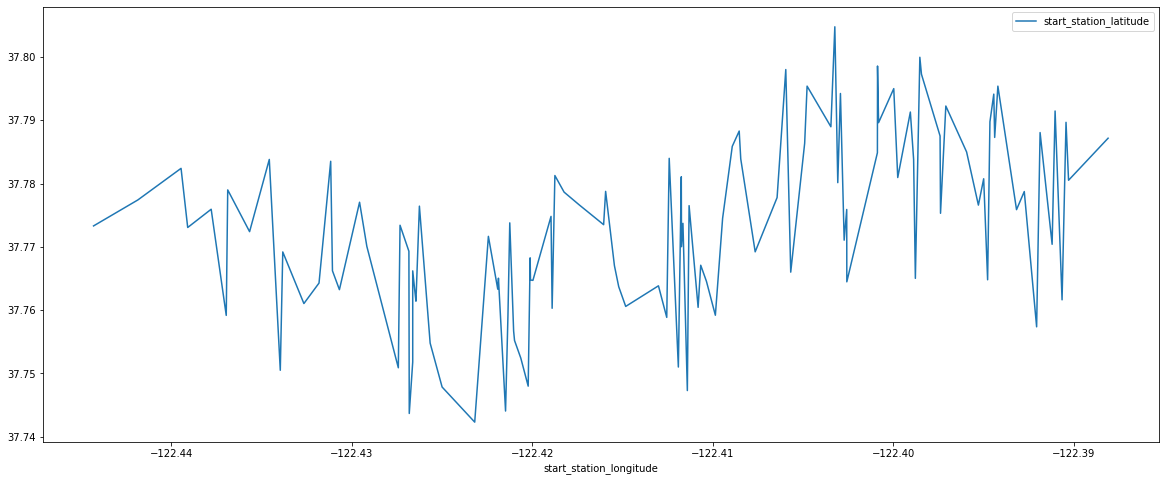

In [ ]:
#Membuat plot grafik area pada station San Fransisco Smart City
#Logitude sebagai sumbu x, latitude sebagai sumbu y dengan ukuran plotnya(20,8)
d.plot(
    x = 'start_station_longitude',
    y = 'start_station_latitude',
    figsize=(20,8)
)

Berdasarkan perintah yang sudah di lakukan pada langkah 2, diperoleh plot grafik yang nilainya koordinatnya naik turun atau zigzag.

3.hitung luas area yang dilingkup stasiun awal menggunakan library Scipy. Hasilnya bersatuan square degree.

In [ ]:
#Menampilkan nilai long dan lot
coordinat = pd.DataFrame({'long' : d.start_station_longitude, 'lat' : d.start_station_latitude})
coordinat

,long,lat
87117,-122.444293,37.773311
130237,-122.441838,37.777416
156847,-122.439446,37.782405
85537,-122.439078,37.773063
90770,-122.437777,37.775946
...,...,...
300347,-122.391034,37.791464
1943,-122.390648,37.761634
77247,-122.390428,37.789677
374710,-122.390288,37.780526


In [ ]:
#Menghitung luas area di bawah kurva menggunakan library scipy
from scipy import integrate

integrate.trapz(coordinat.lat,coordinat.long)


2.122657128891281

Berdasarkan perintah yang sudah di lakukan pada langkah 3, diperoleh niai luas area di bawah kurva dengan langsung mengabungkan koordinat long dan koordinat lat.

**Kesimpulan Problem 2**

Diperoleh banyaknya baris koordinat long dan koordinat lat sebanyak 114, serta menghasilkan nilai integral luas area lingkup statiun awal para persepeda di kota San Francisco Smart City sebesar 2 derajat.

**Pertanyaan**

a. Terdapat 2 jenis integral yaitu definite dan indefinite. Jenis integral apa yang kamu gunakan untuk kasus ini? Berikan alasanmu!

Jawab : Termasuk integral definite, Pertama karena nilai-nilai dari variabel start_station memiliki batasan tertentu sebagai rujukan menghitung luas area yang terletak di antara kurva y=f(x) dan sumbu x dalam rentang area station san franscisco . Kedua karena sudah diketahui batas awal dan batas akhir yaitu longitude sebagai koordinat batas awal serta langitude sebagai koordinat batas akhir. 

b. Terdapat dua metode dalam perhitungan integral yaitu simbolik dan numerik. Mana yang kamu gunakan untuk kasus ini dan mengapa?

Jawab : Mengunakan Integral Numerik, karena mempunyai fungsi kumpulan data berupa numerik bukan simbolik, sehingga akan menghasikan output nilai yang numerik juga.

c. Apakah diperlukan mendefinisikan fungsi matematis ( seperti f(x) = x^2+2 ) pada kasus ini? Berikan penjelasan dan alasanmu!

jawab : Menggunakan import sympy as sy untuk mendefinisikan fungsi f(x) = x^2+2, dimana pada kasus ini bisa menggunakan metode turunan symbolic, yang variabel x nya diangap sebagai symbolic, jika fungsi tersebut di turunkan maka akan menghasilkan turunan pertama bernilai 2.